In [58]:
# import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate,plot_single_plate_biovolume
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
from helper import *

%store -r path_figure
%matplotlib widget
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy
import statsmodels.api as sm
import hashlib
from matplotlib.patches import Ellipse
import logging
plt.style.use('presentation.mplstyle')
logging.getLogger().setLevel(logging.WARNING)

all_analysis_folders = get_analysis_folders()

plate_select = [792,1014,1042,127,130,1023,1045,1053,1048,52,84,938,1076,94,152,102,76,3,12,16,480,91,799,800] #C2
plates = ['1014_20220525', '1023_20220502',
          # '102_20201226',
          '1042_20220523',
       '1045_20220504', '1048_20220506',
          # '1053_20220413',
          '1076_20220511',
       # '127_20220705',
          '152_20201224',
          "3_20220426", "12_20220502","16_20220419","480_20221205", '52_20220707',
          '76_20210108',
       '792_20210915', '799_20211001', '800_20210928',
          '84_20220621', '91_20220708', '938_20220325',
          '94_20201123'
         ]
plates += ["28_20230227",
"206_20230303",
"202_20230314",
"218_20230227",
"219_20230307",
"229_20230330",]
# plates += [
# "850_20230511",
# "840_20230404",
# "861_20230411"
# ]
plates += ["527_20230106","537_20230111"]
plates += ["462_20221013"]
plates += ["532_20220104"]
plates += [
"249_20230324",
"241_20230403",
"252_20230316",
"248_20230320",
]
plates += ["510_20221201",
           "521_20230104",
           "530_20230115"
          ]
plates += [
        # "559_20230109", 
          "558_20230109",
          "552_20230111",
          "551_20220102",
          # "545_20220115",
          # "544_20230109",
          "540_20221227",
          # "531_20221222",
]
plates += [
        "559_20230109", 

          # "545_20220115",
          "544_20230109",
          "531_20221222",
]
plates += [
    # "522_20230115",
         "514_20221206",
         "513_20221205",
         "506_20221124",
         # "503_20221124",
         "472_20221003"
          ]
plates += [
          "558_20230109",
          "552_20230111",
          "551_20220102",
          "540_20221227",
]
plates += [
    "931_20230620",
    "935_20230620",
    "930_20230626",
         ]
plates += ["777_20230328", "772_20230317", "771_20230411"]
plates += [
    "896_20230424",
    "894_20230516",
    "891_20230519",
    "886_20230516",
    "870_20230427",
    "868_20230504",
    "796_20230419",
    "795_20230403",
    "764_20221219",
]
all_analysis_folders = get_analysis_folders()
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,False)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,False)
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,False)
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}
timestep2 = {799 : 100,800 : 25,91:100,99:40}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100,206 : 90,202 : 100,218 : 100,219 :100,229 :100}
timestep = {**timestep, **timestep2}
timestep2 = {431:20}
timestep = {**timestep, **timestep2}
timestep2 = {935:150}
timestep = {**timestep, **timestep2}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    if not plate in timestep.keys():
        timestep[plate] = 100
ncols = 3

time_plate_info = time_plate_info.replace(-1.0,np.nan)

# fig,axs = gridplot(len(plates)+1,ncols = ncols,subh = 3,subw = 3)
# ax_list = list(axs)
plate_speeds = {}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    # ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)]
    time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep']<timestep[plate]]
    # ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['hull_speed'],
    #                 color="black")
    # ax.set_title(plate_id)
    plate_speeds[plate_id] = np.nanmedian(time_plate_info_plate['hull_speed'])
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]
time_plate_info["density_biovolume"] = time_plate_info["tot_biovolume_study"]/time_plate_info["area_sep_comp"]
time_plate_info["density_SA"] = time_plate_info["tot_surface_area_study"]/time_plate_info["area_sep_comp"]
time_plate_info = time_plate_info.replace(-1.0,np.nan)

# fig,axs = gridplot(len(plates)+1,ncols = ncols,subh = 3,subw = 3)
# ax_list = list(axs)
plate_density = {}
plate_density_biov = {}
plate_radius = {}
plate_radius_SA = {}

plate_SA_density = {}

fungalC = {}

plate_strain = {}
plate_start = {}
root = {}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    # ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)]
    folders_plate = folders.loc[folders['unique_id']==int(plate_id)]
    time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep']<timestep[plate]]
    # ax.plot(time_plate_info_plate['time_since_begin_h'],np.sqrt(time_plate_info_plate['density']),
    #                 color="black")
    # ax2 = ax.twinx()
    # ax2.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['density']/time_plate_info_plate['density_biovolume'],
    #                 color="red")
    time_plate_info_plate_median = time_plate_info_plate.loc[time_plate_info_plate['timestep']>=min(max(time_plate_info_plate['timestep']),timestep[plate]-10)]

    plate_density[plate_id] = np.nanmedian(time_plate_info_plate_median['density'])
    plate_density_biov[plate_id] = np.nanmedian(time_plate_info_plate_median['density_biovolume']) 
    plate_radius[plate_id] = np.nanmedian(np.sqrt(time_plate_info_plate_median['density_biovolume']/time_plate_info_plate_median['density']/np.pi)) 
    plate_radius_SA[plate_id] = np.nanmedian(time_plate_info_plate_median['density_SA']/time_plate_info_plate_median['density']/(2*np.pi)) 
    
    plate_strain[plate_id] = folders_plate['strain'].iloc[0]
    plate_start[plate_id] = folders_plate['CrossDate'].iloc[0]
    fungalC[plate_id] = folders_plate['fungalC'].iloc[-1]
    root[plate_id] = folders_plate['root'].iloc[-1]
    
    plate_SA_density[plate_id] = np.nanmedian(time_plate_info_plate_median['density_SA'])
    # ax.set_title(plate_id)
    # break
df = pd.DataFrame({
    'plate_id': list(plates),
    'start': [plate_start[x] for x in plates],
    'speed': [plate_speeds[x] for x in plates],
    'density_SA': [plate_SA_density[x] for x in plates],
    'density_BV': [plate_density_biov[x] for x in plates],
    'density_L': [plate_density[x] for x in plates],
    
    'radius': [plate_radius[x] for x in plates],
    'radius_SA': [plate_radius_SA[x] for x in plates],
    
    'strain': [plate_strain[x] for x in plates],
    'fungalC': [fungalC[x] for x in plates],
    'root': [root[x] for x in plates],
    
    
})
df['strain'] = df['strain'].replace("'A5sp3'","'A5'")
df['fungalC'] = df['fungalC'].replace(np.nan,"100P100N")

df['BV_growth_coeff'] = df['speed']**2*df['density_BV']
df['SA_growth_coeff'] = df['speed']**2*df['density_SA']*np.pi
df['L_growth_coeff'] = df['speed']**2*df['density_L']
df['SA_growth_coeff2'] = df['L_growth_coeff'] * df['radius_SA']*2*np.pi
df['density_SA'] = df['density_SA']/1e6
df['density_BV'] = df['density_BV']/1e9
df['density_L'] = df['density_L']/1e3


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [59]:
time_plate_info['radius'] = np.sqrt(time_plate_info['tot_biovolume_study']/time_plate_info['tot_length_study']/2/np.pi)
# Initialize an empty DataFrame to hold the concatenated data
concatenated_data = []
tmax = 150

for j in range(0, len(plates)):
    
    plate_id = plates[j]
    if type(plate_start[plate_id]) == int and plate_start[plate_id] >= 20220101:
        
        plate = int(plate_id.split('_')[0])
        
        time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'] == int(plate_id)]
        time_plate_info_plate = time_plate_info_plate.sort_values(by='time_since_begin_h')
        folders_plate = folders.loc[folders['unique_id'] == int(plate_id)]
        # time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep'] < timestep[plate]]
        t_shift = time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= 100]['time_since_begin_h'].iloc[0]
        time_plate_info_plate['time_since_begin_h_shifted'] = time_plate_info_plate['time_since_begin_h'] - t_shift
        late_start = len(time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= 200]['time_since_begin_h'])==len(time_plate_info_plate)
        time_plate_info_plate['late_start']=late_start
        # t_shift = time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= 1000]['time_since_begin_h'].iloc[0]
        # time_plate_info_plate['time_since_begin_h_shifted_1000'] = time_plate_info_plate['time_since_begin_h'] - t_shift
        # Add the strain information to the DataFrame
        time_plate_info_plate['strain'] = plate_strain[plate_id]
        # time_plate_info_plate['is_in'] = time_plate_info_plate['timestep']<timestep[plate]
        time_plate_info_plate['ZMUV_radius'] = (time_plate_info_plate['radius']-np.mean(time_plate_info_plate['radius']))
        time_plate_info_plate['ZMUV_SA'] = (time_plate_info_plate['radius']**2-np.mean(time_plate_info_plate['radius']**2))
        
        time_plate_info_plate['strain_unique_id'] = time_plate_info_plate['strain'].astype(str) + '_' + time_plate_info_plate['unique_id'].astype(str)
        # Append this modified DataFrame to a list
        concatenated_data.append(time_plate_info_plate)

# Concatenate all the DataFrames in the list into a single DataFrame
final_data = pd.concat(concatenated_data)

# Replace -1.0 with NaN
final_data = final_data.replace(-1.0, np.nan)
bin_size = 10

final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size
final_data['strain'] = final_data['strain'].replace("'A5sp3'","'A5'")
final_data['tot_volume'] = final_data['spore_volume']+final_data['tot_biovolume_study']
final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size

select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
print(len(select['unique_id'].unique()))
select = select[select['late_start']==False]
print(len(select['unique_id'].unique()))
n_colors = len(final_data['strain'].unique())


57
49


In [63]:
select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
maxes = select.groupby('unique_id')['area_sep_comp'].max()
df['unique_id'] = df['plate_id'].astype(np.int64)
df = df.set_index('unique_id')
df['final_A'] = maxes
maxes = select.groupby('unique_id')['tot_length_study'].max()
df['final_L'] = maxes
maxes = select.groupby('unique_id')['tot_biovolume_study'].max()
df['final_BV'] = maxes

In [64]:
df

,plate_id,start,speed,density_SA,density_BV,density_L,radius,radius_SA,strain,fungalC,root,BV_growth_coeff,SA_growth_coeff,L_growth_coeff,SA_growth_coeff2,final_area,final_A,final_L,final_BV
unique_id,,,,,,,,,,,,,,,,,,,
101420220525,1014_20220525,20220525,233.984941,0.024123,0.000035,1.741891,2.526703,2.205249,'C2',100P100N,'Carrot',1.911323e+09,4.149129e+09,9.536672e+07,1.321400e+09,1809.902900,1809.902900,3.150008e+06,6.300052e+07
102320220502,1023_20220502,20220502,235.199583,0.029699,0.000046,1.912266,2.779305,2.470605,'C2',100P100N,'Carrot',2.567343e+09,5.161301e+09,1.057843e+08,1.642119e+09,2374.163227,2374.163227,3.773627e+06,8.926414e+07
104220220523,1042_20220523,20220523,218.682061,0.026718,0.000040,1.867995,2.613568,2.270640,'C2',100P100N,'Carrot',1.922210e+09,4.013957e+09,8.933097e+07,1.274472e+09,1464.135070,1464.135070,2.674581e+06,5.865530e+07
104520220504,1045_20220504,20220504,256.019065,0.014292,0.000019,1.012818,2.423256,2.247451,'C2',100P100N,'Carrot',1.222938e+09,2.942933e+09,6.638595e+07,9.374459e+08,2236.258985,2236.258985,2.255344e+06,4.019927e+07
104820220506,1048_20220506,20220506,NaN,0.029161,0.000044,1.942117,2.696214,2.410553,'C2',100P100N,'Carrot',NaN,NaN,NaN,NaN,2272.808270,2272.808270,4.478189e+06,1.345123e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87020230427,870_20230427,20230427,249.303808,0.030662,0.000047,1.772088,2.908836,2.756851,'C2',100P100N,'Chicory',2.921733e+09,5.986979e+09,1.101395e+08,1.907815e+09,2146.661488,2146.661488,4.006623e+06,1.109798e+08
86820230504,868_20230504,20230504,269.795729,0.025965,0.000045,1.387098,3.199652,2.979198,'C2',100P100N,'Chicory',3.247378e+09,5.937540e+09,1.009665e+08,1.889978e+09,1666.826189,1666.826189,2.312052e+06,7.436233e+07
79620230419,796_20230419,20230419,291.327348,0.030802,0.000054,1.613824,3.262694,3.036188,'C2',100P100N,'Chicory',4.581565e+09,8.212890e+09,1.369678e+08,2.612926e+09,2830.899991,2830.899991,4.541612e+06,1.554097e+08


49


<AxesSubplot: xlabel='time_since_begin_h_shifted', ylabel='area_sep_comp'>

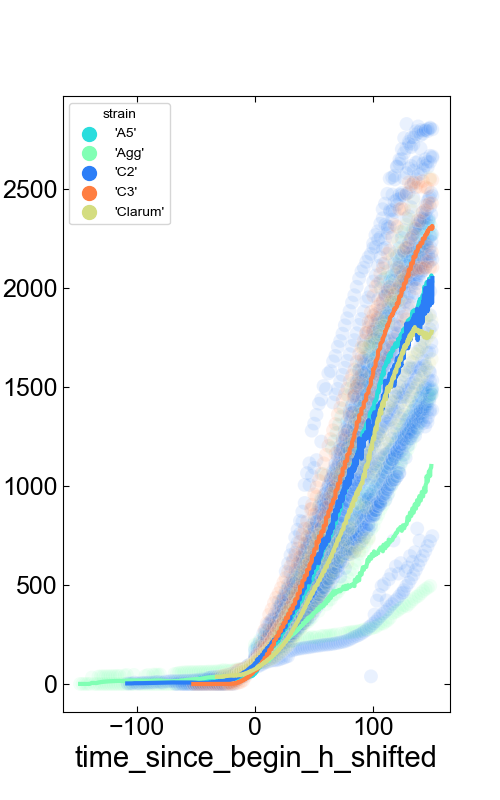

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming select DataFrame and strain_to_color dictionary already exist
select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(select['strain'].unique(), palette))
select = select[select['late_start']==False]

# Sort the data by strain and tot_surface_area_study
select = select.sort_values(by=['strain', 'time_since_begin_h_shifted'])
print(len(select['unique_id'].unique()))

# Calculate moving average for each strain based on tot_surface_area_study ordering
window_size = 30
select['area_sep_comp_ma'] = select.groupby('strain')['area_sep_comp'].transform(lambda x: x.rolling(window=window_size,min_periods = 1).mean())

# Plotting
fig, ax = plt.subplots(figsize=(5,8))
sns.scatterplot(data=select, x='time_since_begin_h_shifted', y='area_sep_comp', hue='strain', ax=ax, palette=strain_to_color, alpha=0.1)
sns.lineplot(data=select, x='time_since_begin_h_shifted', y='area_sep_comp_ma', hue='strain', ax=ax, palette=strain_to_color, legend=False)  # suppress legend for lineplot
# ax.set_ylim(0,2e6)


In [65]:
df_0 = df.copy() 


In [66]:
# df = df_0[df_0['strain']=="'C2'"]


df = df_0
df = df[df['density_SA']>=0]


df.loc[df['plate_id'] == '470_20230709', 'fungalC'] = "'000P100N'"
df.loc[df['fungalC'] == "'000P100N'", 'strain'] = "'C2_0P'"
# df.loc[df['start'] >= 20230201, 'root'] = "Carrot_Vasilis"
df.loc[df['root'] == "'CarrotEN'", 'root'] = "Carrot Vasilis"
df.loc[df['root'] == "'Carrot'", 'root'] = "Carrot"


In [67]:
def plot_scatter_with_mean_and_ci(df, x_col, y_col, ax, label=None):
    n_colors = len(df['root'].unique())
    palette = sns.color_palette("Reds", n_colors)
    strain_to_color = dict(zip(df['root'].unique(), palette))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='root', palette=strain_to_color, ax=ax)
    # sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color="black", ax=ax)

    for strain, color in strain_to_color.items():
        sub_df = df[df['root'] == strain]
        x_mean = sub_df[x_col].mean()
        y_mean = sub_df[y_col].mean()
        x_ci = 2 * sub_df[x_col].std()/np.sqrt(len(sub_df))
        y_ci = 2 * sub_df[y_col].std()/np.sqrt(len(sub_df))
        ax.errorbar(x=x_mean, y=y_mean, xerr=x_ci, yerr=y_ci, color=color, fmt='o')

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    if label:
        ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

In [69]:
root_dir = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA"
analysis_dir = "PRINCE_ANALYSIS"
df_sum = pd.read_excel(os.path.join(root_dir, analysis_dir, "plate_summary2.xlsx"))

In [70]:
df_sum['start'] = pd.to_datetime(df_sum['start'], errors='coerce')
df_sum['crossed']  = pd.to_datetime(df_sum['crossed'], errors='coerce')
df_sum['date_fungus']  = pd.to_datetime(df_sum['age fungus'], errors='coerce')

C:\Users\coren\AppData\Local\Temp\ipykernel_27264\3327574555.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sum['start'] = pd.to_datetime(df_sum['start'], errors='coerce')
C:\Users\coren\AppData\Local\Temp\ipykernel_27264\3327574555.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sum['crossed']  = pd.to_datetime(df_sum['crossed'], errors='coerce')
C:\Users\coren\AppData\Local\Temp\ipykernel_27264\3327574555.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sum['date_fungus']  = pd.to_datetime(df_sum['age fungus'], errors='coerce')


In [71]:
df_sum['age'] = df_sum['crossed']-df_sum['start']
df_sum['age_fungus'] = df_sum['crossed']-df_sum['date_fungus']
df_sum['real_root'] = df_sum['root']
df_sum['real_root'] = df_sum['root']
df_sum.loc[df_sum['real_root'] == "EN daurus carota", 'real_root'] = "Carrot Vasilis"
df_sum.loc[df_sum['real_root'] == "carrotV", 'real_root'] = "Carrot Vasilis"
df_sum.loc[df_sum['real_root'] == "CarrotEN", 'real_root'] = "Carrot Vasilis"

df_sum.loc[df_sum['real_root'] == "Carrot", 'real_root'] = "Carrot Toby"

df_sum.loc[df_sum['real_root'] == "carrot", 'real_root'] = "Carrot Toby"
df_sum.loc[df_sum['real_root'] == "CH cichorium intybus", 'real_root'] = "Chichorium"
df_sum.loc[df_sum['real_root'] == "BE nicotiana benthamiana", 'real_root'] = "Nicotiana"

merged_df = df.merge(df_sum, left_on='plate_id', right_on='unique_id', how='inner')
merged_df['age'] = merged_df['age'].dt.days.astype(int)
# merged_df['age_fungus'] = merged_df['age_fungus'].dt.days.astype(int)


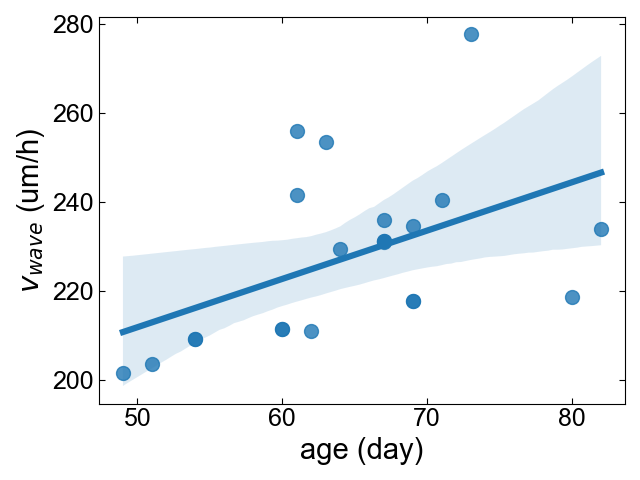

In [74]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
select = select[select['strain']=="'C2'"]

# select= merged_df
sns.regplot(select,x='age',y='speed')
# for index,row in select.iterrows():
#     ax.text(row['age'],row['speed'],row['unique_id'])
ax.set_xlabel('age (day)')
ax.set_ylabel('$v_{wave}$ (um/h)')
plt.tight_layout()

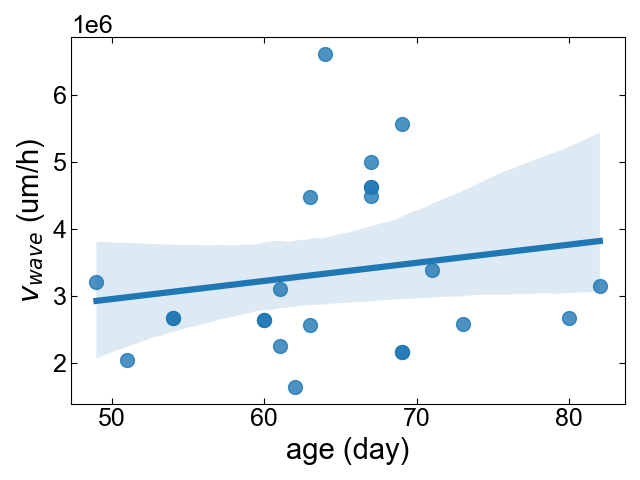

In [77]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
select = select[select['strain']=="'C2'"]

# select= merged_df
sns.regplot(select,x='age',y='final_L')
# for index,row in select.iterrows():
#     ax.text(row['age'],row['speed'],row['unique_id'])
ax.set_xlabel('age (day)')
ax.set_ylabel('$v_{wave}$ (um/h)')
plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Unique combinations of strain and real_root
combinations = merged_df.groupby(['strain', 'real_root']).size().index

# Define a color palette for the strains and a linestyle for the real_roots
unique_strains = merged_df['strain'].unique()
palette = sns.color_palette('tab10', len(unique_strains))
strain_to_color = {strain: palette[i] for i, strain in enumerate(unique_strains)}

unique_roots = merged_df['real_root'].unique()
linestyles = ['-', '--', '-.', ':']
root_to_linestyle = {root: linestyles[i % len(linestyles)] for i, root in enumerate(unique_roots)}

# The marker styles for scatter points corresponding to linestyles
linestyle_to_marker = {'-': 'o', '--': 'x', '-.': 'D', ':': 'X'}

for strain, real_root in combinations:
    select = merged_df[(merged_df['strain'] == strain) & (merged_df['real_root'] == real_root)]
    
    # Plot scatter points separately
    ax.scatter(select['age'], select['speed'], color=strain_to_color[strain], 
               marker=linestyle_to_marker[root_to_linestyle[real_root]], s=30, label=f'{strain}, {real_root}')
    
    # Plot regression line without scatter points using sns.regplot
    sns.regplot(data=select, x='age', y='speed', ax=ax, 
                color=strain_to_color[strain], scatter=False, 
                line_kws={'linestyle': root_to_linestyle[real_root]})

ax.set_xlabel('age (day)')
ax.set_ylabel('$v_{wave}$ (um/h)')
ax.legend(title="Strain, Root", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
linestyle_to_marker[root_to_linestyle[real_root]]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Unique combinations of strain and real_root
combinations = merged_df.groupby(['strain', 'real_root']).size().index

# Define a color palette for the strains and a linestyle for the real_roots
unique_strains = merged_df['strain'].unique()
palette = sns.color_palette('tab10', len(unique_strains))
strain_to_color = {strain: palette[i] for i, strain in enumerate(unique_strains)}

unique_roots = merged_df['real_root'].unique()
linestyles = ['-', '--', '-.', ':']
root_to_linestyle = {root: linestyles[i % len(linestyles)] for i, root in enumerate(unique_roots)}

for strain, real_root in combinations:
    select = merged_df[(merged_df['strain'] == strain) & (merged_df['real_root'] == real_root)]
    sns.regplot(data=select, x='age', y='L_growth_coeff', ax=ax, 
                color=strain_to_color[strain], label=f'{strain}, {real_root}', 
                scatter_kws={'s': 30}, line_kws={'linestyle': root_to_linestyle[real_root]})

ax.set_xlabel('age (day)')
ax.set_ylabel('$v_{wave}$ (um/h)')
ax.legend(title="Strain, Root", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
# select= merged_df
sns.regplot(select,x='age',y='radius')
for index,row in select.iterrows():
    ax.text(row['age'],row['radius'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
# select= merged_df
sns.regplot(select,x='speed',y='radius')
for index,row in select.iterrows():
    ax.text(row['speed'],row['radius'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.regplot(select,x='age',y='BV_growth_coeff')
for index,row in select.iterrows():
    ax.text(row['age'],row['BV_growth_coeff'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['real_root']=='Carrot Toby']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.regplot(select,x='age',y='density_BV')
for index,row in select.iterrows():
    ax.text(row['age'],row['density_BV'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['root_y']=='carrot']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.regplot(select,x='speed',y='BV_growth_coeff')
for index,row in select.iterrows():
    ax.text(row['speed'],row['BV_growth_coeff'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['root_y']=='carrot']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.scatterplot(select,x='crossed',y='density_BV')
for index,row in select.iterrows():
    ax.text(row['crossed'],row['density_BV'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['root_y']=='carrot']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.scatterplot(select,x='crossed',y='speed')
for index,row in select.iterrows():
    ax.text(row['crossed'],row['speed'],row['unique_id'])

In [ ]:
fig,ax = plt.subplots()
select = merged_df[merged_df['root_y']=='carrot']
select = select[select['L_growth_coeff']>0]
select = select[select['L_growth_coeff']<1e15]

# select= merged_df
sns.scatterplot(select,x='crossed',y='speed')
for index,row in select.iterrows():
    ax.text(row['crossed'],row['speed'],row['unique_id'])